# Logistic Regression

### Problem Statement :- 
        - Whether the clinet has subscribed a term deposit or not 

### Data Cleaning & Processing

Loading the dataset

In [2]:
deposit <- read.csv("~/desktop/Digi 360/Module 9/bank_data.csv")

In [3]:
head(deposit,5)

age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
## Finding the null values
sum(is.na(deposit))

[1] 0

In [5]:
#Let's see the data structure
str(deposit)

'data.frame':	45211 obs. of  32 variables:
 $ age            : int  58 44 33 47 33 35 28 42 58 43 ...
 $ default        : int  0 0 0 0 0 0 0 1 0 0 ...
 $ balance        : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing        : int  1 1 1 1 0 1 1 1 1 1 ...
 $ loan           : int  0 0 1 0 0 0 1 0 0 0 ...
 $ duration       : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays          : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutfailure    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutother      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutsuccess    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutunknown    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ con_cellular   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ con_telephone  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ con_unknown    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ divorced       : int  0 0 0 0 0 0 0 1 0 0 ...
 $ married        : int  1 0 1 1 0 1 0 0 1 0 ...
 $ single         : int 

In [6]:
#Let's see the summary stats of the data frame
summary(deposit)

      age           default           balance          housing      
 Min.   :18.00   Min.   :0.00000   Min.   : -8019   Min.   :0.0000  
 1st Qu.:33.00   1st Qu.:0.00000   1st Qu.:    72   1st Qu.:0.0000  
 Median :39.00   Median :0.00000   Median :   448   Median :1.0000  
 Mean   :40.94   Mean   :0.01803   Mean   :  1362   Mean   :0.5558  
 3rd Qu.:48.00   3rd Qu.:0.00000   3rd Qu.:  1428   3rd Qu.:1.0000  
 Max.   :95.00   Max.   :1.00000   Max.   :102127   Max.   :1.0000  
      loan           duration         campaign          pdays      
 Min.   :0.0000   Min.   :   0.0   Min.   : 1.000   Min.   : -1.0  
 1st Qu.:0.0000   1st Qu.: 103.0   1st Qu.: 1.000   1st Qu.: -1.0  
 Median :0.0000   Median : 180.0   Median : 2.000   Median : -1.0  
 Mean   :0.1602   Mean   : 258.2   Mean   : 2.764   Mean   : 40.2  
 3rd Qu.:0.0000   3rd Qu.: 319.0   3rd Qu.: 3.000   3rd Qu.: -1.0  
 Max.   :1.0000   Max.   :4918.0   Max.   :63.000   Max.   :871.0  
    previous         poutfailure       po

In [7]:
## Lets check if any outliers present by checking the percentiles till 99.5%
quants <- c(0,0.25,0.50,0.75,0.90,0.95,0.99,0.995,1)
apply( deposit[1:9] , 2 , quantile , probs = quants , na.rm = TRUE )

,age,default,balance,housing,loan,duration,campaign,pdays,previous
0%,18,0,-8019.00,0,0,0.0,1,-1,0.0
25%,33,0,72.00,0,0,103.0,1,-1,0.0
50%,39,0,448.00,1,0,180.0,2,-1,0.0
75%,48,0,1428.00,1,0,319.0,3,-1,0.0
90%,56,0,3574.00,1,1,548.0,5,185,2.0
95%,59,0,5768.00,1,1,751.0,8,317,3.0
99%,71,1,13164.90,1,1,1269.0,16,370,8.9
99.5%,77,1,18014.35,1,1,1501.9,21,410,12.0
100%,95,1,102127.00,1,1,4918.0,63,871,275.0


From above summary we cleary see that there are some outliers. So let's remove them.

In [8]:
#Removing data from below columns above 99%
temp1 = deposit[deposit$balance < quantile(deposit$balance, 0.99), ]
temp2 = temp1[temp1$duration < quantile(temp1$duration, 0.99), ]
temp3 = temp2[temp2$campaign < quantile(temp2$campaign, 0.99), ]
temp4 = temp3[temp3$pdays < quantile(temp3$pdays, 0.99), ]
trm_dep = temp4[temp4$previous < quantile(temp4$previous, 0.99), ]


In [9]:
summary(trm_dep)

      age           default           balance         housing      
 Min.   :18.00   Min.   :0.00000   Min.   :-8019   Min.   :0.0000  
 1st Qu.:33.00   1st Qu.:0.00000   1st Qu.:   69   1st Qu.:0.0000  
 Median :39.00   Median :0.00000   Median :  436   Median :1.0000  
 Mean   :40.91   Mean   :0.01824   Mean   : 1150   Mean   :0.5555  
 3rd Qu.:48.00   3rd Qu.:0.00000   3rd Qu.: 1375   3rd Qu.:1.0000  
 Max.   :95.00   Max.   :1.00000   Max.   :13164   Max.   :1.0000  
      loan           duration         campaign          pdays       
 Min.   :0.0000   Min.   :   0.0   Min.   : 1.000   Min.   : -1.00  
 1st Qu.:0.0000   1st Qu.: 104.0   1st Qu.: 1.000   1st Qu.: -1.00  
 Median :0.0000   Median : 179.0   Median : 2.000   Median : -1.00  
 Mean   :0.1618   Mean   : 245.6   Mean   : 2.534   Mean   : 34.18  
 3rd Qu.:0.0000   3rd Qu.: 314.0   3rd Qu.: 3.000   3rd Qu.: -1.00  
 Max.   :1.0000   Max.   :1266.0   Max.   :15.000   Max.   :369.00  
    previous       poutfailure        pou

### Checking collinearity

In [10]:
round(cor(trm_dep),2)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
age,1.00,-0.02,0.10,-0.18,-0.01,-0.01,0.02,-0.03,0.01,-0.01,...,0.09,-0.02,0.45,-0.01,-0.07,-0.20,-0.07,0.00,0.05,0.02
default,-0.02,1.00,-0.09,-0.01,0.08,0.00,0.01,-0.03,-0.03,-0.03,...,0.00,0.00,-0.01,0.01,0.00,-0.02,-0.01,0.01,-0.01,-0.02
balance,0.10,-0.09,1.00,-0.07,-0.10,0.03,-0.02,0.01,0.04,0.03,...,0.00,0.06,0.05,0.02,-0.04,0.01,-0.01,0.01,0.01,0.08
housing,-0.18,-0.01,-0.07,1.00,0.04,0.01,-0.04,0.13,0.04,0.11,...,-0.08,-0.06,-0.15,-0.03,0.07,-0.09,-0.01,-0.05,-0.08,-0.15
loan,-0.01,0.08,-0.10,0.04,1.00,-0.01,0.00,-0.02,-0.02,0.00,...,-0.02,-0.04,-0.01,-0.01,0.03,-0.06,0.01,-0.04,-0.03,-0.07
duration,-0.01,0.00,0.03,0.01,-0.01,1.00,-0.08,0.00,0.01,-0.02,...,-0.01,-0.01,0.03,0.00,0.00,-0.01,-0.01,0.02,-0.01,0.39
campaign,0.02,0.01,-0.02,-0.04,0.00,-0.08,1.00,-0.09,-0.07,-0.09,...,0.01,0.02,-0.03,0.01,0.00,-0.03,0.02,-0.02,0.02,-0.08
pdays,-0.03,-0.03,0.01,0.13,-0.02,0.00,-0.09,1.00,0.70,0.73,...,-0.03,-0.02,0.00,-0.01,0.01,0.02,-0.01,-0.01,-0.02,0.08
previous,0.01,-0.03,0.04,0.04,-0.02,0.01,-0.07,0.70,1.00,0.59,...,-0.02,0.01,0.02,0.00,-0.01,0.04,0.00,-0.01,-0.01,0.15
poutfailure,-0.01,-0.03,0.03,0.11,0.00,-0.02,-0.09,0.73,0.59,1.00,...,-0.02,0.00,0.00,0.00,0.00,0.01,0.00,-0.01,-0.01,0.00


### Scaling - Normalizing

In [11]:
install.packages('caret', dependencies = TRUE)
library('caret')

also installing the dependencies ‘nloptr’, ‘classInt’, ‘lme4’, ‘questionr’, ‘BradleyTerry2’, ‘e1071’, ‘klaR’, ‘Cubist’

Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘nloptr’ had non-zero exit status”Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘e1071’ had non-zero exit status”Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘Cubist’ had non-zero exit status”Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘classInt’ had non-zero exit status”Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘lme4’ had non-zero exit status”Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘questionr’ had non-zero exit status”Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘BradleyTerry2’ had non-zero e

### Train and Test Split

In [12]:
library('caTools') 
set.seed(123) 
split = sample.split(trm_dep, SplitRatio = 0.7) 
train = subset(trm_dep, split == TRUE)
test = subset(trm_dep, split == FALSE) 

In [13]:
head(train)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
1,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,35,0,231,1,0,139,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
7,28,0,447,1,1,217,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
9,58,0,121,1,0,50,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
library('caret')
preproc = preProcess(train, method = c("range"))

train_norm <- predict(preproc, train)
 
summary(train_norm)

      age            default           balance          housing      
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1948   1st Qu.:0.00000   1st Qu.:0.3818   1st Qu.:0.0000  
 Median :0.2727   Median :0.00000   Median :0.3993   Median :1.0000  
 Mean   :0.2974   Mean   :0.01871   Mean   :0.4329   Mean   :0.5542  
 3rd Qu.:0.3896   3rd Qu.:0.00000   3rd Qu.:0.4440   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  
      loan           duration          campaign           pdays        
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.08215   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0000   Median :0.14139   Median :0.07143   Median :0.00000  
 Mean   :0.1614   Mean   :0.19376   Mean   :0.10926   Mean   :0.09418  
 3rd Qu.:0.0000   3rd Qu.:0.24803   3rd Qu.:0.14286   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
    pr

### Building the First Training Model

In [15]:
logm1 <- glm(y~.,data=train_norm, family='binomial')
summary(logm1)


Call:
glm(formula = y ~ ., family = "binomial", data = train_norm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3213  -0.3805  -0.2465  -0.1488   3.1289  

Coefficients: (4 not defined because of singularities)
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -4.780211   0.304642 -15.691  < 2e-16 ***
age             -0.037752   0.210207  -0.180  0.85747    
default         -0.049912   0.195991  -0.255  0.79898    
balance          1.305604   0.223805   5.834 5.42e-09 ***
housing         -0.810542   0.051095 -15.863  < 2e-16 ***
loan            -0.607203   0.074511  -8.149 3.66e-16 ***
duration         6.219093   0.114038  54.535  < 2e-16 ***
campaign        -1.819371   0.194997  -9.330  < 2e-16 ***
pdays           -1.123106   0.189788  -5.918 3.27e-09 ***
previous         0.544790   0.193947   2.809  0.00497 ** 
poutfailure      0.693637   0.146520   4.734 2.20e-06 ***
poutother        0.856412   0.163582   5.235 1.65e-07 ***
poutsucc

Here there are few features for which p value is high. Let's remove them.

Let's remove `joself.employed`, `joservices`, `jotechnician`, `poutunknown`, `con_unknown`, `single`, `joentrepreneur`, `jounemployed`, `age` and `default`


In [16]:
train_norm <- train_norm[,-c(1,2,13,16,19, 22, 26:27, 29:31)]

In [17]:
logm2 <- glm(y~.,data=train_norm, family='binomial')
summary(logm2)


Call:
glm(formula = y ~ ., family = "binomial", data = train_norm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3245  -0.3804  -0.2469  -0.1487   3.1286  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.76238    0.13611 -34.990  < 2e-16 ***
balance        1.30194    0.22221   5.859 4.66e-09 ***
housing       -0.80700    0.05035 -16.029  < 2e-16 ***
loan          -0.60923    0.07412  -8.219  < 2e-16 ***
duration       6.21664    0.11397  54.545  < 2e-16 ***
campaign      -1.81781    0.19486  -9.329  < 2e-16 ***
pdays         -1.12086    0.18971  -5.908 3.45e-09 ***
previous       0.54702    0.19385   2.822  0.00477 ** 
poutfailure    0.69077    0.14645   4.717 2.40e-06 ***
poutother      0.85647    0.16354   5.237 1.63e-07 ***
poutsuccess    2.97375    0.13942  21.329  < 2e-16 ***
con_cellular   1.18917    0.07249  16.404  < 2e-16 ***
con_telephone  1.25779    0.10954  11.483  < 2e-16 ***
divorced      -0.15643    0.07869

### Checking VIF

In [18]:
install.packages("fmsb")
library(fmsb)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 methods overwritten by 'fmsb':
  method    from
  print.roc pROC
  plot.roc  pROC


In [19]:
vif_func<-function(in_frame,thresh=10,trace=T,...){
  
  require(fmsb)
  
  if(class(in_frame) != 'data.frame') in_frame<-data.frame(in_frame)
  
  #get initial vif value for all comparisons of variables
  vif_init<-NULL
  var_names <- names(in_frame)
  for(val in var_names){
    regressors <- var_names[-which(var_names == val)]
    form <- paste(regressors, collapse = '+')
    form_in <- formula(paste(val, '~', form))
    vif_init<-rbind(vif_init, c(val, VIF(lm(form_in, data = in_frame, ...))))
  }
  vif_max<-max(as.numeric(vif_init[,2]), na.rm = TRUE)
  
  if(vif_max < thresh){
    if(trace==T){ #print output of each iteration
      prmatrix(vif_init,collab=c('var','vif'),rowlab=rep('',nrow(vif_init)),quote=F)
      cat('\n')
      cat(paste('All variables have VIF < ', thresh,', max VIF ',round(vif_max,2), sep=''),'\n\n')
    }
    return(var_names)
  }
  else{
    
    in_dat<-in_frame
    
    #backwards selection of explanatory variables, stops when all VIF values are below 'thresh'
    while(vif_max >= thresh){
      
      vif_vals<-NULL
      var_names <- names(in_dat)
      
      for(val in var_names){
        regressors <- var_names[-which(var_names == val)]
        form <- paste(regressors, collapse = '+')
        form_in <- formula(paste(val, '~', form))
        vif_add<-VIF(lm(form_in, data = in_dat, ...))
        vif_vals<-rbind(vif_vals,c(val,vif_add))
      }
      max_row<-which(vif_vals[,2] == max(as.numeric(vif_vals[,2]), na.rm = TRUE))[1]
      
      vif_max<-as.numeric(vif_vals[max_row,2])
      
      if(vif_max<thresh) break
      
      if(trace==T){ #print output of each iteration
        prmatrix(vif_vals,collab=c('var','vif'),rowlab=rep('',nrow(vif_vals)),quote=F)
        cat('\n')
        cat('removed: ',vif_vals[max_row,1],vif_max,'\n\n')
        flush.console()
      }
      
      in_dat<-in_dat[,!names(in_dat) %in% vif_vals[max_row,1]]
      
    }
    
    return(names(in_dat))
    
  }
  
}

In [20]:
col<- vif_func(in_frame=train_norm,thresh=5,trace=T)

 var           vif             
 balance       1.03198081716211
 housing       1.18068355814479
 loan          1.024546155063  
 duration      1.20633165707991
 campaign      1.03244160676266
 pdays         5.49324284032444
 previous      3.03722545552166
 poutfailure   5.89978618924077
 poutother     2.72647090125773
 poutsuccess   2.2237587211241 
 con_cellular  1.34133235706185
 con_telephone 1.21006423362317
 divorced      1.28638400148113
 married       1.34605125207669
 joadmin.      1.17431710610735
 joblue.collar 1.30106333181917
 johousemaid   1.06253353700219
 jomanagement  1.26102704093255
 joretired     1.14436082621687
 jostudent     1.09631147511097
 y             1.37739530560057

removed:  poutfailure 5.899786 



Here we can see that feature `poutfailure` has VIF greater than 5. Let's remove it. and rebuild the model.

In [21]:
train_norm$poutfailure <- NULL

In [22]:
logm3 <- glm(y~.,data=train_norm, family='binomial')
summary(logm3)


Call:
glm(formula = y ~ ., family = "binomial", data = train_norm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2687  -0.3826  -0.2478  -0.1487   3.1290  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -4.76436    0.13589 -35.060  < 2e-16 ***
balance        1.35818    0.22137   6.135 8.49e-10 ***
housing       -0.81807    0.05034 -16.250  < 2e-16 ***
loan          -0.61344    0.07417  -8.271  < 2e-16 ***
duration       6.19218    0.11367  54.474  < 2e-16 ***
campaign      -1.89274    0.19475  -9.719  < 2e-16 ***
pdays         -0.48237    0.13151  -3.668 0.000245 ***
previous       1.02141    0.16510   6.187 6.14e-10 ***
poutother      0.32072    0.11900   2.695 0.007038 ** 
poutsuccess    2.50436    0.09503  26.354  < 2e-16 ***
con_cellular   1.20764    0.07226  16.712  < 2e-16 ***
con_telephone  1.26885    0.10939  11.599  < 2e-16 ***
divorced      -0.16033    0.07867  -2.038 0.041541 *  
married       -0.32384    0.05206

col<- vif_func(in_frame=train_norm,thresh=5,trace=T)

All features are having good VIF and significant p values. So, let's stop building the model here.

### Predictions on Train set

In [31]:
y_train_pred <- train_norm[, c("y"), drop=FALSE]
head(y_train_pred)

,y
1,0
2,0
3,0
6,0
7,0
9,0


In [32]:
y_train_pred$y_prob <- predict(logm3,train_norm,type="response")
head(y_train_pred)

,y,y_prob
1,0,0.022170652
2,0,0.013025134
3,0,0.003562889
6,0,0.010923037
7,0,0.012126744
9,0,0.010685826


In [36]:
y_train_pred$pred_values <- ifelse(y_train_pred$y_prob>0.5,1,0)
head(y_train_pred)

,y,y_prob,pred_values
1,0,0.022170652,0
2,0,0.013025134,0
3,0,0.003562889,0
6,0,0.010923037,0
7,0,0.012126744,0
9,0,0.010685826,0


In [37]:
table(y_train_pred$pred_values)


    0     1 
27707  1691 

In [39]:
#Confusion Matrix
confusion<-table(y_train_pred$y_prob>0.5,y_train_pred$y)
confusion

       
            0     1
  FALSE 25555  2152
  TRUE    619  1072

In [41]:
# Predicted     not_sub    subscribe
# Actual
# not_sub         25555     2152
# subscribe         619     1072

### Finding the Accuracy 

In [40]:
Accuracy<-sum(diag(confusion)/sum(confusion))
Accuracy 

[1] 0.9057419

### ROC Curve

In [43]:
install.packages('ROCR')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [44]:
library(ROCR)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



Formal class 'performance' [package "ROCR"] with 6 slots
  ..@ x.name      : chr "False positive rate"
  ..@ y.name      : chr "True positive rate"
  ..@ alpha.name  : chr "Cutoff"
  ..@ x.values    :List of 1
  .. ..$ : num [1:29361] 0 0 0 0 0 ...
  ..@ y.values    :List of 1
  .. ..$ : num [1:29361] 0 0.00031 0.00062 0.000931 0.001241 ...
  ..@ alpha.values:List of 1
  .. ..$ : num [1:29361] Inf 0.999 0.998 0.997 0.996 ...


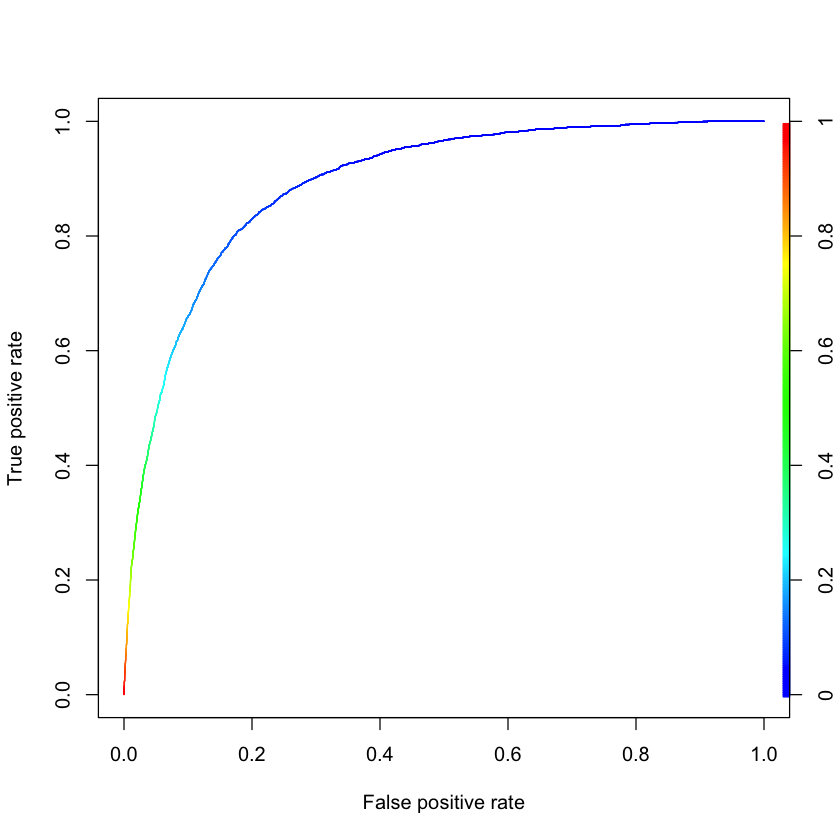

In [48]:
rocrpred<-prediction(y_train_pred$y_prob,y_train_pred$y)
rocrperf<-performance(rocrpred,'tpr','fpr')

str(rocrperf)

plot(rocrperf,colorize=T,text.adj=c(-0.2,1.7))

### Area under the curve

In [122]:
roccurve=roc(y_train_pred$y, y_train_pred$y_prob) #real outcome and predicted score is plotted
auc(roccurve)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8908

### Finding Optimal Cut off point using Precision and Recall

In [54]:
str(rocrperf)
rocr_cutoff <- data.frame(cut_off = rocrperf@alpha.values[[1]],fpr=rocrperf@x.values,tpr=rocrperf@y.values)
colnames(rocr_cutoff) <- c("cut_off","FPR","TPR")
head(rocr_cutoff)

Formal class 'performance' [package "ROCR"] with 6 slots
  ..@ x.name      : chr "False positive rate"
  ..@ y.name      : chr "True positive rate"
  ..@ alpha.name  : chr "Cutoff"
  ..@ x.values    :List of 1
  .. ..$ : num [1:29361] 0 0 0 0 0 ...
  ..@ y.values    :List of 1
  .. ..$ : num [1:29361] 0 0.00031 0.00062 0.000931 0.001241 ...
  ..@ alpha.values:List of 1
  .. ..$ : num [1:29361] Inf 0.999 0.998 0.997 0.996 ...


cut_off,FPR,TPR
Inf,0,0.0000000000
0.9987566,0,0.0003101737
0.9977547,0,0.0006203474
0.9972827,0,0.0009305211
0.9960716,0,0.0012406948
0.9953000,0,0.0015508685


In [65]:
library(dplyr)
rocr_cutoff$cut_off <- round(rocr_cutoff$cut_off,6)
# Sorting data frame with respect to tpr in decreasing order 
rocr_cutoff <- arrange(rocr_cutoff,desc(TPR))
head(rocr_cutoff)

cut_off,FPR,TPR
0.007483,0.9120883,1
0.007478,0.9121265,1
0.007476,0.9121647,1
0.007475,0.9122029,1
0.007472,0.9122412,1
0.007471,0.9122794,1


In [75]:
# Get the cutoff for the best accuracy
cutoff_data=data.frame(cutoff=0,TP=0,FP=0,FN=0,TN=0)
cutoffs=seq(0,1,length=100)

In [94]:
for (i in cutoffs){
  predicted=as.numeric(y_train_pred$y_prob>i)
  
  TP=sum(predicted==1 & y_train_pred$y==1)
  FP=sum(predicted==1 & y_train_pred$y==0)
  FN=sum(predicted==0 & y_train_pred$y==1)
  TN=sum(predicted==0 & y_train_pred$y==0)
  cutoff_data=rbind(cutoff_data,c(i,TP,FP,FN,TN))
}
## lets remove the dummy data cotaining top row in data frame cutoff_data
cutoff_data=cutoff_data[-1,]
#we now have 100 obs in df cutoff_data

In [96]:
#Let's calculate Sensitivity, Specificity, Precision and Recall

cutoff_data=cutoff_data %>%
  mutate(P=FN+TP,N=TN+FP, #total positives and negatives
         Sn=TP/P, #sensitivity
         Sp=TN/N, #specificity
         KS=abs((TP/P)-(FP/N)),
         Accuracy=(TP+TN)/(P+N),
         Lift=(TP/P)/((TP+FP)/(P+N)),
         Precision=TP/(TP+FP), #Precision
         Recall=TP/P #Recall
  ) %>% 
  select(-P,-N)

In [98]:
#Finding the cutoff

KS_cutoff=cutoff_data$cutoff[which.max(cutoff_data$KS)]
KS_cutoff

[1] 0.09090909

### Predict on Test Data

In [106]:
# Min Max scaling for test data
preproc = preProcess(test, method = c("range"))

test_norm <- predict(preproc, test)
 
summary(test_norm)


      age            default           balance          housing      
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1974   1st Qu.:0.00000   1st Qu.:0.2398   1st Qu.:0.0000  
 Median :0.2763   Median :0.00000   Median :0.2607   Median :1.0000  
 Mean   :0.3017   Mean   :0.01721   Mean   :0.3025   Mean   :0.5583  
 3rd Qu.:0.3947   3rd Qu.:0.00000   3rd Qu.:0.3142   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  
      loan           duration          campaign           pdays        
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.08082   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0000   Median :0.14184   Median :0.07143   Median :0.00000  
 Mean   :0.1626   Mean   :0.19426   Mean   :0.11022   Mean   :0.09706  
 3rd Qu.:0.0000   3rd Qu.:0.24802   3rd Qu.:0.14286   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
    pr

In [107]:
y_test_pred <- test_norm[, c("y"), drop=FALSE]
head(y_test_pred)

,y
4,0
5,0
8,0
11,0
16,0
20,0


In [108]:
y_test_pred$y_prob <- predict(logm3,test_norm,type="response")
head(y_test_pred)

,y,y_prob
4,0,0.005357065
5,0,0.029953286
8,0,0.027571177
11,0,0.017704256
16,0,0.038070816
20,0,0.004838722


In [109]:
y_test_pred$pred_values <- ifelse(y_test_pred$y_prob>0.09090,1,0)
head(y_test_pred)

,y,y_prob,pred_values
4,0,0.005357065,0
5,0,0.029953286,0
8,0,0.027571177,0
11,0,0.017704256,0
16,0,0.038070816,0
20,0,0.004838722,0


In [110]:
table(y_test_pred$pred_values)


    0     1 
10015  3348 

In [126]:
#Confusion Matrix
confusion<-table(y_test_pred$y_prob>0.0909,y_test_pred$y)
confusion

       
           0    1
  FALSE 9764  251
  TRUE  2178 1170

In [127]:
Accuracy<-sum(diag(confusion)/sum(confusion))
Accuracy

[1] 0.8182294

Formal class 'performance' [package "ROCR"] with 6 slots
  ..@ x.name      : chr "False positive rate"
  ..@ y.name      : chr "True positive rate"
  ..@ alpha.name  : chr "Cutoff"
  ..@ x.values    :List of 1
  .. ..$ : num [1:13356] 0 0 0 0 0 ...
  ..@ y.values    :List of 1
  .. ..$ : num [1:13356] 0 0.000704 0.001407 0.002111 0.002815 ...
  ..@ alpha.values:List of 1
  .. ..$ : num [1:13356] Inf 0.996 0.995 0.994 0.991 ...


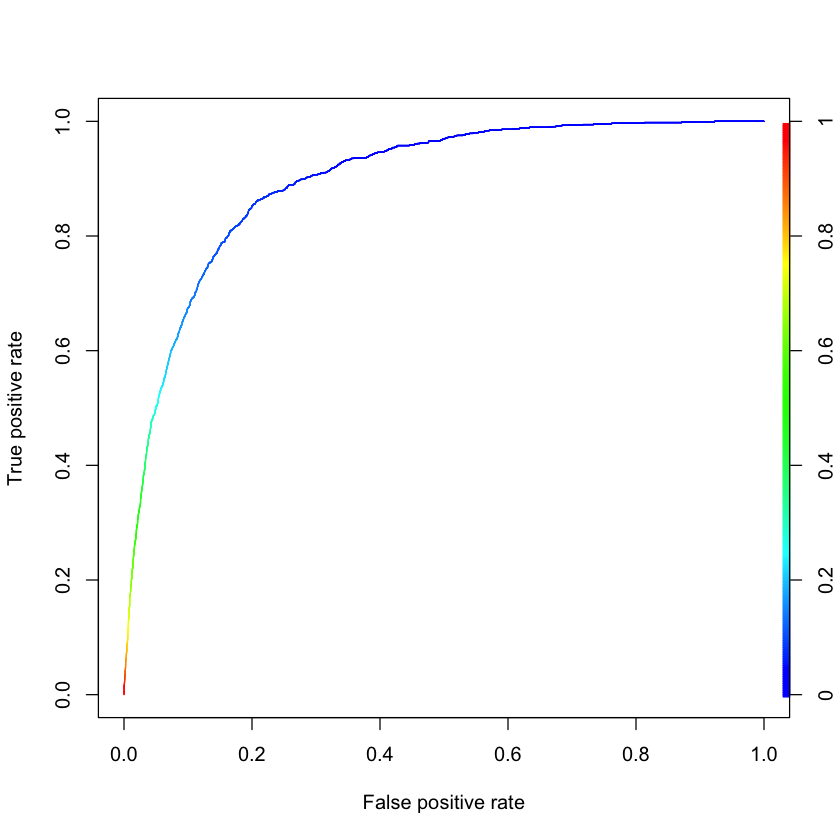

In [113]:
### ROC curve with cut-off value

rocrpred<-prediction(y_test_pred$y_prob,y_test_pred$y)
rocrperf<-performance(rocrpred,'tpr','fpr')

str(rocrperf)

plot(rocrperf,colorize=T,text.adj=c(-0.2,1.7))

In [115]:
install.packages('pROC')
library(pROC)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following object is masked from ‘package:fmsb’:

    roc

The following objects are masked from ‘package:stats’:

    cov, smooth, var



### Area Under the Curve

In [120]:
roccurve=roc(y_test_pred$y, y_test_pred$y_prob) #real outcome and predicted score is plotted
auc(roccurve)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.896

### Conclusion

Hence, the no. of customers to be focused upon for term deposits by the bank are predicted successfully using logistic regression model with an accuracy of 82% approximately. 